In [89]:
import pandas as pd
import matplotlib as plt 
import plotly.express as px
import seaborn as sns

In [90]:
df = pd.read_csv('/Users/pernebayarailym/Documents/Portfolio Projects AP/Python Projects/Project_18_HOMICIDE_Analysis/homicide_by_countries.csv')
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [91]:
df.shape

(195, 6)

In [92]:
df.isnull().sum()
#df.dropna(subset = ['Subregion'], inplace = True) #If I have any null column and I wanna drop it, this function uses

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [93]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [94]:
df['Rate'] = df['Rate'].astype(int)

In [95]:
#If I have many columns to convert the dtype, in professional way 
my_list = ['Rate', 'Count', 'Year']
for i in my_list:
    print(i)
    df[i] = df[i].astype(int)

Rate
Count
Year


In [96]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [97]:
df1 = df.sort_values('Count', ascending=False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [98]:
df1 = df[['Location', 'Count']].sort_values(by = 'Count', ascending = False).head(5)
df1['Perc'] = (df1['Count']*100/df1['Count'].sum()).round(2)
df1

,Location,Count,Perc
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


Text(0, 0.5, '')

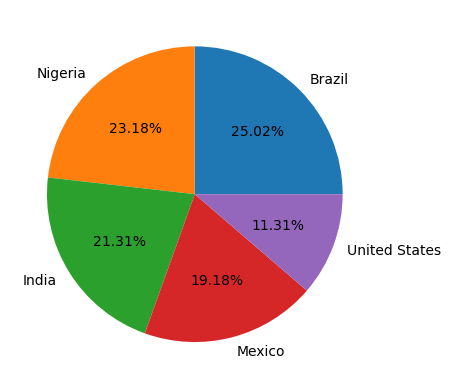

In [100]:
ax = df1.plot(kind = 'pie', y='Count', labels=df1['Location'], autopct='%1.2f%%', legend=False)
ax.set_ylabel('') #to hide labels 

In [102]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [101]:
df2 = df.groupby('Region')['Count'].sum()
df2

Region
Africa       99481
Americas    153597
Asia        105552
Europe       19869
Oceania        347
Name: Count, dtype: int64